In [1]:
from binance.client import Client
import pandas as pd

import numpy as np
from datetime import datetime
import warnings

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn import metrics

warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
public_key = 'e1d7cb244abecac6d9a32032de40c50d0ebab221879e8d0e827a2ef80a67f307'
secrect_key = 'f55b0a5da751c351845f062f253e23491bbefd6a00016036d5b36842faebcad6'
currency = 'BTCUSDT'
vela = "1m"

client = Client(public_key, secrect_key)

filter = " 6 hours ago UTC"

if vela == "1m":
    klines = client.get_historical_klines(currency, Client.KLINE_INTERVAL_1MINUTE, filter)


string_headers = 'Open time	Open	High	Low	Close	Volume	Close time	Base asset volume	Number of trades	Taker buy volume	Taker buy base asset volume	Ignore'
headers = string_headers.split('\t')
df = pd.DataFrame(klines, columns=headers)

df['date'] = pd.to_datetime(df['Close time'], unit='ms', origin='unix')
df = df.rename(columns = {'Open': 'open',  'High': 'high', 'Low': 'low', 'Close': 'close', 'Close time': 'timestamp'})
df['open'] = df['open'].astype('float')
df['high'] = df['high'].astype('float')
df['low'] = df['low'].astype('float')
df['close'] = df['close'].astype('float')

df = df[['date', 'open', 'high', 'low', 'close', 'timestamp']]

In [46]:
dic_result = []
variable_a_medir = 'close'

regressor = LinearRegression()

longitud = df.shape[0]
for longi in range(longitud, 1, -longitud//30):
    local_Xset = df.iloc[longi:]
    print(f'longi: {longi}, shape: {local_Xset.shape[0]}')
    if local_Xset.shape[0] > 30:
        X = local_Xset['timestamp'].values.reshape(-1,1)
        Y = local_Xset[variable_a_medir].values.reshape(-1,1)

        regressor.fit(X, Y) #training the algorithm
        Y_est = regressor.predict(X)

        dic_result.append({'coeficiente': list(list(regressor.coef_)[0])[0], 'MAE': metrics.mean_absolute_error(Y, Y_est),
                        'RootMSErr':np.sqrt(metrics.mean_squared_error(Y, Y_est)), 'num_obs': local_Xset.shape[0]})

regres_result = pd.DataFrame.from_dict(dic_result)

longi: 360, shape: 0
longi: 348, shape: 12
longi: 336, shape: 24
longi: 324, shape: 36
longi: 312, shape: 48
longi: 300, shape: 60
longi: 288, shape: 72
longi: 276, shape: 84
longi: 264, shape: 96
longi: 252, shape: 108
longi: 240, shape: 120
longi: 228, shape: 132
longi: 216, shape: 144
longi: 204, shape: 156
longi: 192, shape: 168
longi: 180, shape: 180
longi: 168, shape: 192
longi: 156, shape: 204
longi: 144, shape: 216
longi: 132, shape: 228
longi: 120, shape: 240
longi: 108, shape: 252
longi: 96, shape: 264
longi: 84, shape: 276
longi: 72, shape: 288
longi: 60, shape: 300
longi: 48, shape: 312
longi: 36, shape: 324
longi: 24, shape: 336
longi: 12, shape: 348


In [47]:
#define F-test function
# rechazar Ho si p < 0.1
def f_test(row):
    f = row['F']
    n1 = row['n1'] - 1
    n2 = row['n2'] - 1
    p = 1-scipy.stats.f.cdf(f, n1, n2) #find p-value of F test statistic 
    return p


regres_result['F'] = regres_result.RootMSErr / regres_result.RootMSErr.shift()
regres_result['n1'] = regres_result.num_obs.astype('float')
regres_result['n2'] = regres_result.num_obs.shift()
regres_result = regres_result.dropna()
regres_result['p'] = regres_result.apply(lambda row: f_test(row), axis=1)
regres_result.iloc[3]


regres_result

,coeficiente,MAE,RootMSErr,num_obs,F,n1,n2,p
1,-0.000106,32.625161,42.898930,48,0.959096,48.0,36.0,0.558453
2,-0.000097,32.481875,41.009013,60,0.955945,60.0,48.0,0.568584
3,-0.000068,50.393259,59.857015,72,1.459606,72.0,60.0,0.067935
4,-0.000048,63.695643,70.694172,84,1.181051,84.0,72.0,0.236505
5,-0.000035,68.603427,77.292955,96,1.093343,96.0,84.0,0.339608
6,-0.000029,66.594201,75.632453,108,0.978517,108.0,96.0,0.544843
7,-0.000035,66.143545,75.080991,120,0.992709,120.0,108.0,0.516789
8,-0.000038,63.376112,72.956828,132,0.971708,132.0,120.0,0.564675
9,-0.000036,62.352239,71.264993,144,0.976810,144.0,132.0,0.555453
10,-0.000034,61.362023,70.264980,156,0.985968,156.0,144.0,0.535160


In [56]:
arg_sup_ind = regres_result.loc[regres_result.p < 0.1].index[0]-1
regres_result.loc[arg_sup_ind]['num_obs']


# a ṕartir de los ultimos 60 valores (close) del dataset, se genera una lista
# esa lista se le van agregando valores en tiempo real y con todos los datos se calcula otra
# regresion, con MSE y F para calcular los MSE de originales con los de nuevos datos

60.0

In [55]:
arg_sup_ind

2

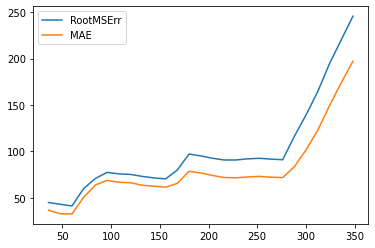

In [5]:
x = regres_result.num_obs
y = regres_result.RootMSErr
z = regres_result.MAE

fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(x, y)
plt.plot(x, z)
ax.legend(('RootMSErr', 'MAE'))


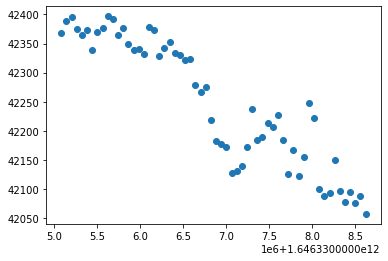

In [7]:
x = df.timestamp.values[-60:]
y = df.close.values[-60:]

fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(x, y)


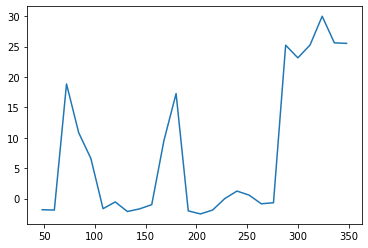

In [12]:
x = regres_result.num_obs
y = regres_result.dif_err


fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(x, y)



In [31]:
import numpy as np
import scipy.stats

#define F-test function
def f_test(x, y):
    x = np.array(x)
    y = np.array(y)
    f = np.var(x, ddof=1)/np.var(y, ddof=1) #calculate F test statistic 
    dfn = x.size-1 #define degrees of freedom numerator 
    dfd = y.size-1 #define degrees of freedom denominator
    print(f'f: {f}')
    p = 1-scipy.stats.f.cdf(f, dfn, dfd) #find p-value of F test statistic 
    return f, p

#perform F-test
x = [18, 19, 22, 25, 27, 28, 41, 45, 51, 55]
y = [14, 15, 15, 17, 18, 22, 25, 25, 27, 34]
f_test(x, y)



f: 4.387122002085505


(4.387122002085505, 0.01912653593238578)